In [41]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [3]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
df.columns = df.columns.str.replace(' ', '_').str.replace('.', '')

C:\Users\hp\AppData\Local\Temp\ipykernel_11668\1596328221.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(' ', '_').str.replace('.', '')


In [11]:
df['Chance_of_Admit_']=np.where(df['Chance_of_Admit_'] >= 0.5,1,0)

In [16]:
df.head(20)

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,1
5,6,330,115,5,4.5,3.0,9.34,1,1
6,7,321,109,3,3.0,4.0,8.20,1,1
7,8,308,101,2,3.0,4.0,7.90,0,1
8,9,302,102,1,2.0,1.5,8.00,0,1
9,10,323,108,3,3.5,3.0,8.60,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No          500 non-null    int64  
 1   GRE_Score          500 non-null    int64  
 2   TOEFL_Score        500 non-null    int64  
 3   University_Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR_               500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance_of_Admit_   500 non-null    int32  
dtypes: float64(3), int32(1), int64(5)
memory usage: 33.3 KB


In [19]:
df.isnull().sum()

Serial_No            0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR_                 0
CGPA                 0
Research             0
Chance_of_Admit_     0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [23]:
df.drop(['Serial_No'], axis = 1, inplace = True)

<AxesSubplot: >

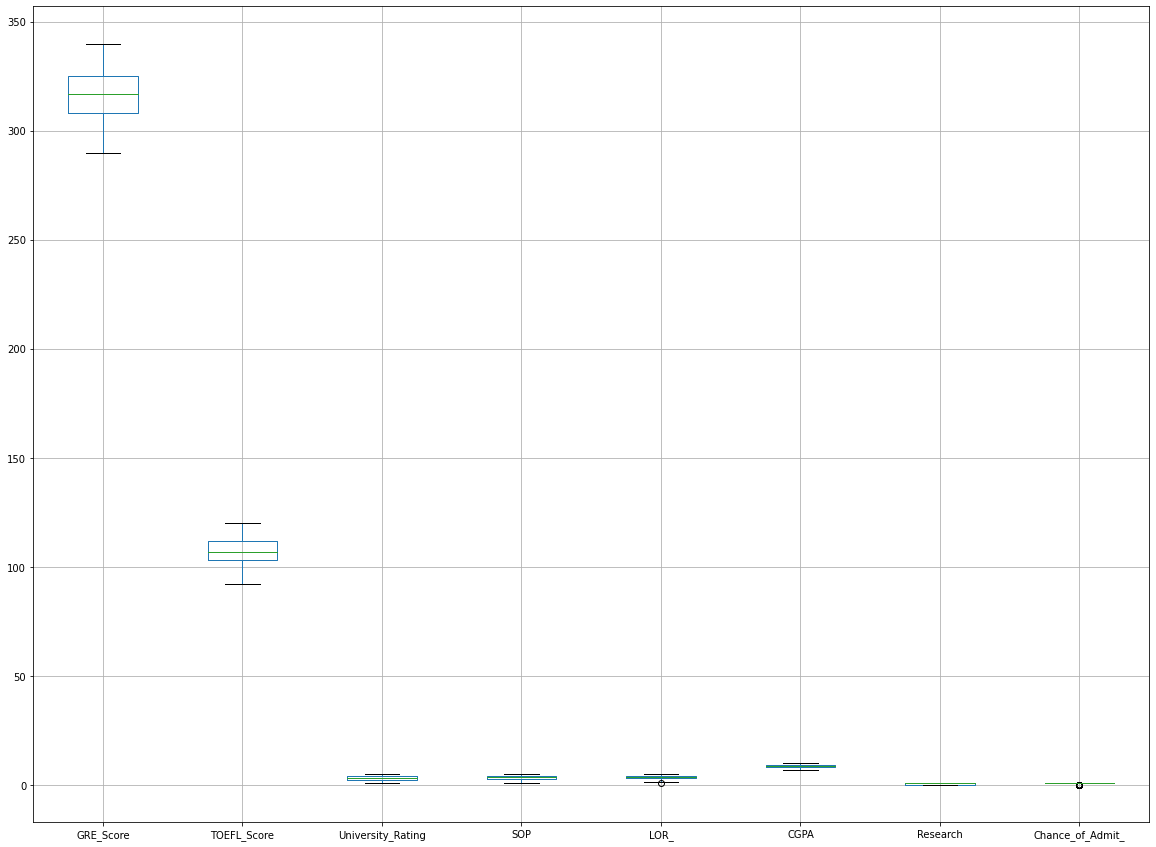

In [27]:
plt.figure(figsize = (20,15))
df.boxplot()


In [28]:
corr =df.corr(method='pearson')

C:\Users\hp\AppData\Local\Temp\ipykernel_11668\334746280.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


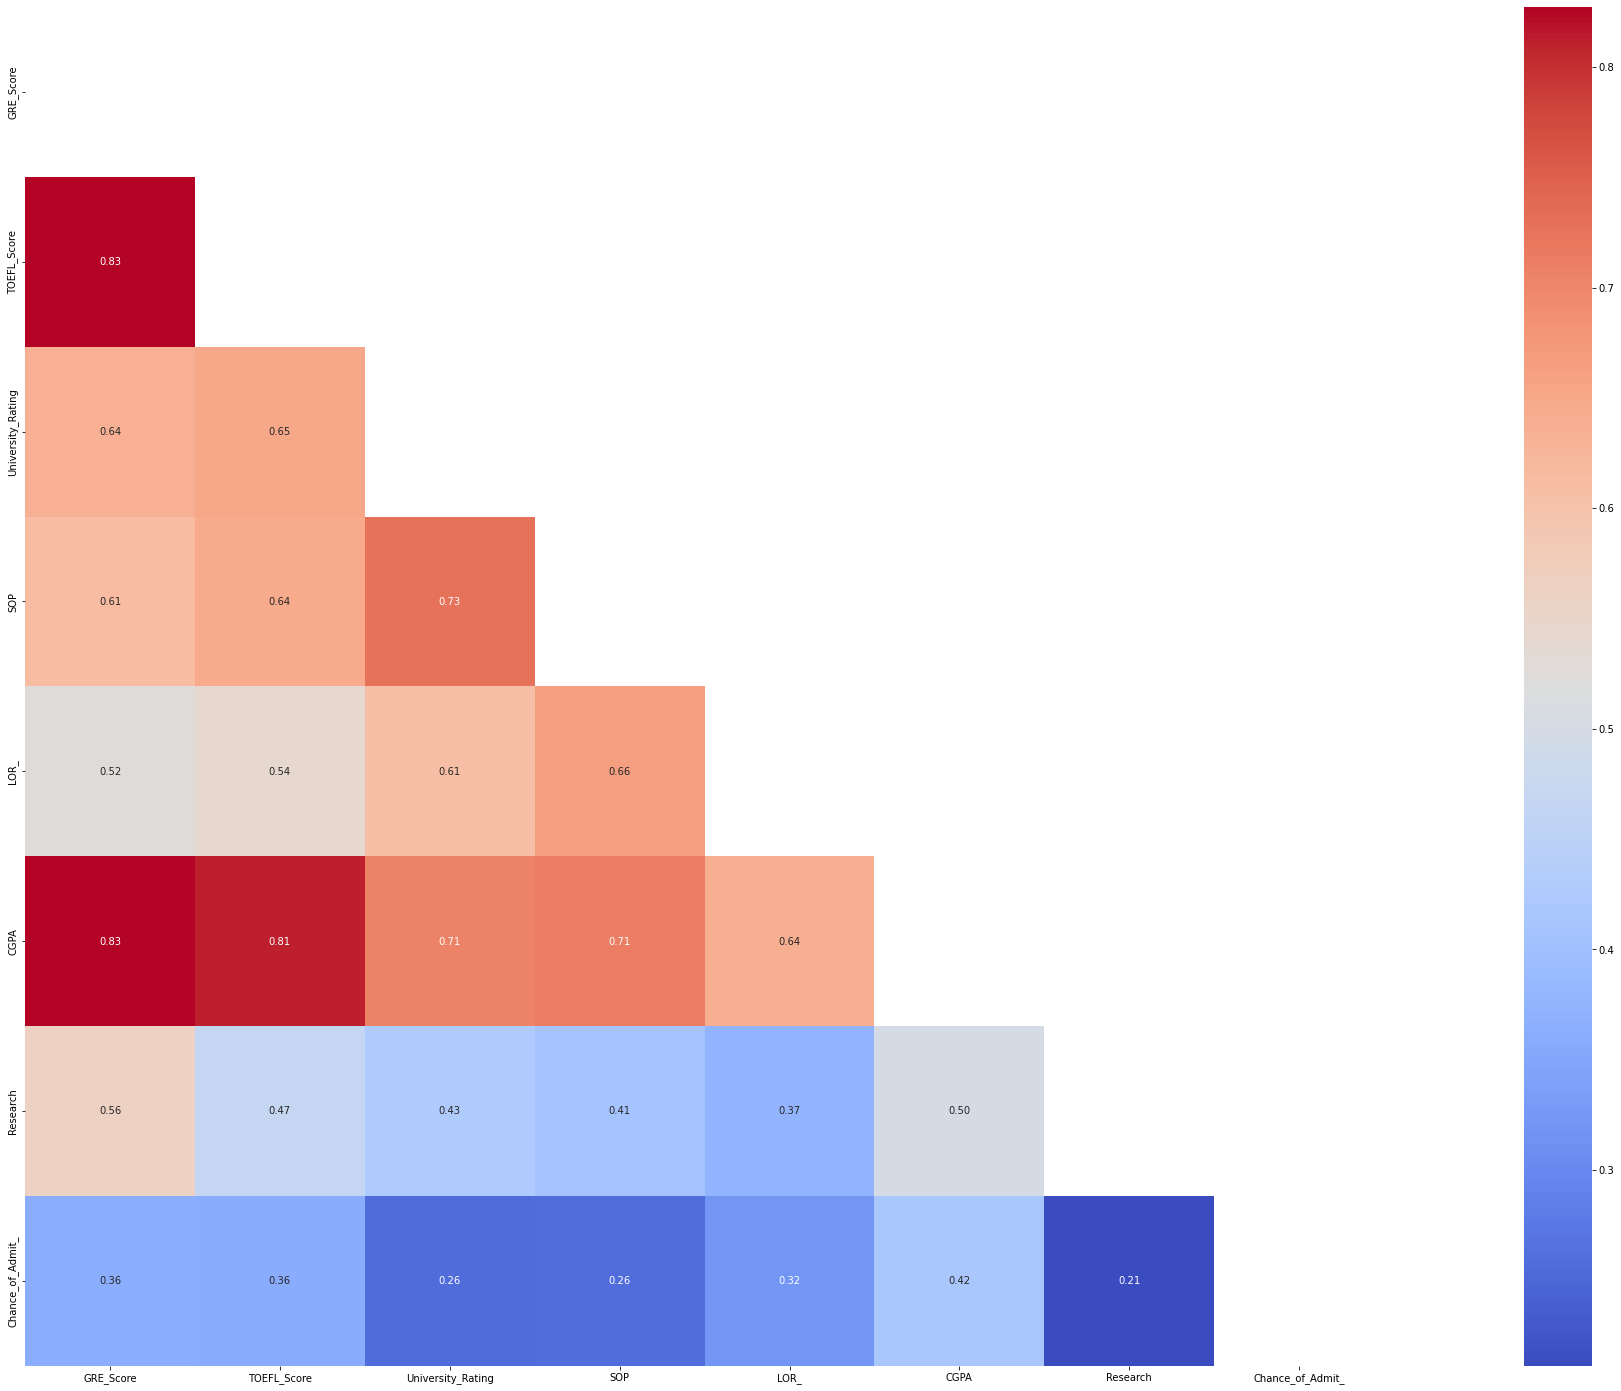

In [29]:
#calculate column correlations and make a seaborn heatmap - Before standardisation
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(50,25))  # setting the size of figure to 12 by 10
p=sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask, cmap='coolwarm',square=True)

In [30]:
df.corr()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
GRE_Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.360530
TOEFL_Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.359774
University_Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.255606
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.257281
LOR_,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.321536
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.416508
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.211175
Chance_of_Admit_,0.360530,0.359774,0.255606,0.257281,0.321536,0.416508,0.211175,1.000000


In [32]:
X = df.drop('Chance_of_Admit_', axis=1)
y = df['Chance_of_Admit_']

In [33]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [34]:
y_train.value_counts(1)

1    0.934286
0    0.065714
Name: Chance_of_Admit_, dtype: float64

In [35]:
y_test.value_counts(1)

1    0.906667
0    0.093333
Name: Chance_of_Admit_, dtype: float64

Logistic Regression Model

In [36]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.6s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

Predicting on Training and Test dataset

In [37]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

Getting the Predicted Classes and Probs

In [38]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.019761,0.980239
1,0.005303,0.994697
2,0.000033,0.999967
3,0.001658,0.998342
4,0.000635,0.999365


In [39]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.9542857142857143

AUC and ROC for the training data

AUC: 0.940


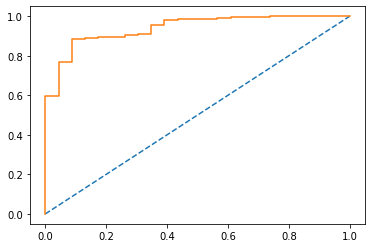

In [42]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [43]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.94

AUC and ROC for the test data

AUC: 0.940


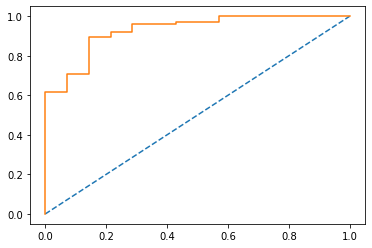

In [44]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

Confusion Matrix for the training data

In [45]:
confusion_matrix(y_train, ytrain_predict)

array([[ 10,  13],
       [  3, 324]], dtype=int64)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


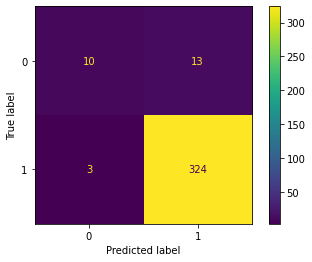

In [46]:
plot_confusion_matrix(model,X_train,y_train);

In [47]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.43      0.56        23
           1       0.96      0.99      0.98       327

    accuracy                           0.95       350
   macro avg       0.87      0.71      0.77       350
weighted avg       0.95      0.95      0.95       350



Confusion Matrix for test data

In [48]:
confusion_matrix(y_test, ytest_predict)

array([[  6,   8],
       [  1, 135]], dtype=int64)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


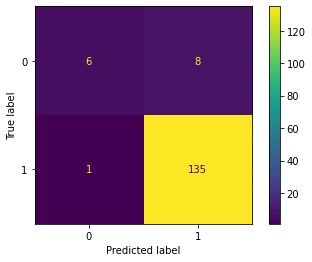

In [49]:
plot_confusion_matrix(model,X_test,y_test);

In [50]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.86      0.43      0.57        14
           1       0.94      0.99      0.97       136

    accuracy                           0.94       150
   macro avg       0.90      0.71      0.77       150
weighted avg       0.94      0.94      0.93       150

